In [81]:
%matplotlib inline
from ggplot import *
import pandas as pd
import numpy as np
from altair import *
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('chapter-12-relay-foods.xlsx', sheetname='Purchase Data - Full Study')

In [3]:
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [17]:
#Gets the year and month
df['YearMonth'] = df['OrderDate'].dt.year.map(str) + "-" + df['OrderDate'].dt.month.map("{:02}".format)
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,YearMonth
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [18]:
#Adds an additional column that links each user with their first purchase
firstPurchase = df.groupby('UserId').first().reset_index()
firstPurchase = firstPurchase[['UserId','YearMonth']]
firstPurchase.columns = ['UserId','PurchaseCohort']
purchaseCohort = pd.merge(df, firstPurchase, left_on='UserId', right_on='UserId')
purchaseCohort.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,YearMonth,PurchaseCohort
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [19]:
#cohortGroups = purchaseCohort.groupby(purchaseCohort.FirstPurchase).count().reset_index()
#cohortGroups = cohortGroups[['FirstPurchase','UserId']]
#cohortGroups.columns = ['CohortGroup','Count']
#cohortGroups

In [20]:
#cohort_graph = ggplot(aes(y='CohortGroup',x='Count'),data=cohortGroup)


In [21]:
#See how much each cohort group spent in each month
#For each cohort group, for each OrderPeriod, how much did all of the people
#in the cohort spend during that OrderPeriod.

In [22]:
cohortGroup = purchaseCohort.groupby(['PurchaseCohort','YearMonth'])
cohortData = cohortGroup.agg({'UserId': pd.Series.nunique,
                             'OrderId':pd.Series.nunique,
                             'TotalCharges': np.sum})
cohortData.head(15)

TotalCharges  UserId  OrderId
PurchaseCohort YearMonth                               
2009-01        2009-01       1850.2550      22       30
               2009-02       1351.0650       8       25
               2009-03       1357.3600      10       26
               2009-04       1604.5000       9       28
               2009-05       1575.6250      10       26
               2009-06       1384.8400       8       26
               2009-07       1750.8400       8       24
               2009-08       1426.5714       7       21
               2009-09       1964.2755       7       24
               2009-10        860.3292       7       13
               2009-11       1821.8153       7       21
               2009-12       2152.1165       8       22
               2010-01       2084.2236      11       25
               2010-02       2068.7771       7       19
               2010-03       1504.3325       6       12

In [23]:
cohortData.groupby(level=0).apply(lambda x: len(x))

PurchaseCohort
2009-01    15
2009-02    13
2009-03    13
2009-04    12
2009-05    11
2009-06    10
2009-07     9
2009-08     8
2009-09     7
2009-10     6
2009-11     5
2009-12     4
2010-01     3
2010-02     2
2010-03     1
dtype: int64

In [24]:
def countRows(df):
    df['CohortPeriod'] = list(range(1, len(df)+1))
    return df

In [25]:
cohortData = cohortData.groupby(level=0).apply(countRows)

In [80]:
cohortData.head()

TotalCharges  UserId  OrderId  CohortPeriod
PurchaseCohort YearMonth                                             
2009-01        2009-01        1850.255      22       30             1
               2009-02        1351.065       8       25             2
               2009-03        1357.360      10       26             3
               2009-04        1604.500       9       28             4
               2009-05        1575.625      10       26             5

In [93]:
cohortRI = cohortData.reset_index()
cohortRI.head()

,PurchaseCohort,YearMonth,TotalCharges,UserId,OrderId,CohortPeriod
0,2009-01,2009-01,1850.255,22,30,1
1,2009-01,2009-02,1351.065,8,25,2
2,2009-01,2009-03,1357.360,10,26,3
3,2009-01,2009-04,1604.500,9,28,4
4,2009-01,2009-05,1575.625,10,26,5


In [117]:
period = cohortRI.groupby('PurchaseCohort').first().reset_index()
period = period[['PurchaseCohort', 'UserId']]
retentionRate = pd.merge(test, period, left_on='PurchaseCohort', right_on='PurchaseCohort')
retentionRate['Retention'] = test2.UserId_x / test2.UserId_y
retentionRate = retentionRate.drop('UserId_y', 1)
retentionRate.head()

,PurchaseCohort,YearMonth,TotalCharges,UserId_x,OrderId,CohortPeriod,Retention
0,2009-01,2009-01,1850.255,22,30,1,1.000000
1,2009-01,2009-02,1351.065,8,25,2,0.363636
2,2009-01,2009-03,1357.360,10,26,3,0.454545
3,2009-01,2009-04,1604.500,9,28,4,0.409091
4,2009-01,2009-05,1575.625,10,26,5,0.454545


In [119]:
cohortPivot = retentionRate.pivot(index='CohortPeriod',columns='PurchaseCohort', values='Retention')
cohortPivot

PurchaseCohort,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


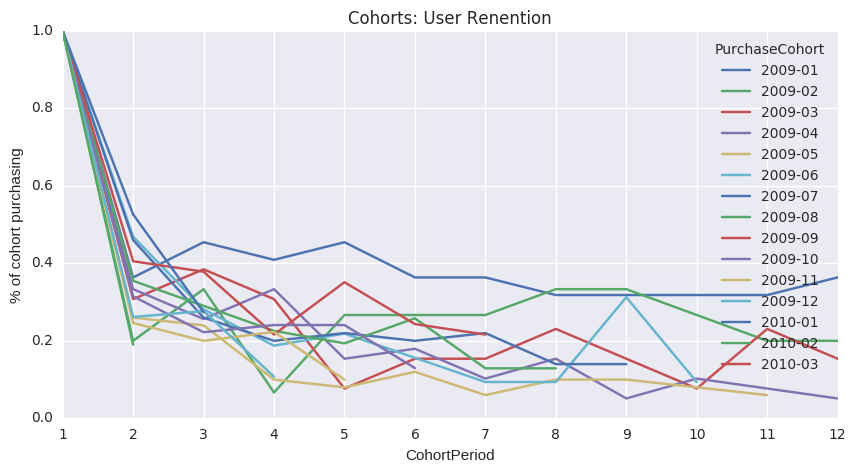

In [121]:
cohortPivot.plot(figsize=(10,5))
plt.title('Cohorts: User Renention')
plt.xticks(np.arange(1,12.1,1))
plt.xlim(1,12)
plt.ylabel('% of cohort purchasing')

In [137]:
cohortPivot

PurchaseCohort,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
Chart(cohortPivot).mark_text(applyColorToBackground=True).encode(
    color="activepct",
    column="CohortPeriod",
    row="PurchaseCohort"
    #text="Retention"
)

In [135]:
heatmap(cohortPivot, row='CohortGroup', column='CohortPeriod',color='activepct')

In [131]:
def heatmap(data, row, column, color, cellsize=(30, 15)):
    """Create an Altair Heat-Map

    Parameters
    ----------
    row, column, color : str
        Altair trait shorthands
    cellsize : tuple
        specify (width, height) of cells in pixels
    """
    return Chart(data).mark_text(
               applyColorToBackground=True,
           ).encode(
               row=row,
               column=column,
               text=Text(value=' '),
               color=color
           ).configure_scale(
               textBandWidth=cellsize[0],
               bandSize=cellsize[1]
           )